In [1]:
%load_ext autoreload
%autoreload 2

In [24]:
import numpy as np
from plot_drift import plot_drift
from plot_trajectory import plot_trajectory

In [25]:
!./run.sh
output_dir = "output/dust_drift/"

make: Entering directory '/home/rometsch/repo/fargocpt/src'
mpic++  Theo.o output.o data.o open-simplex-noise.o backtrace.o boundary_conditions.o pvte_law.o TransportEuler.o nongnu.o Pframeforce.o config.o constants.o mpi_utils.o LowTasks.o RungeKutta.o SourceEuler.o radialgrid.o units.o massflow_tracker.o opacity.o stress.o handle_signals.o options.o parameters.o main.o accretion.o sts.o circumplanetary_mass.o radialarray.o selfgravity.o find_cell_id.o axilib.o hydro_dt_logger.o quantities.o simulation.o cfl.o Interpret.o Force.o start_mode.o split.o init.o polargrid.o logging.o global.o commbound.o fpe.o SideEuler.o frame_of_reference.o util.o gas_torques.o particles/particle.o particles/particles.o particles/dust_diffusion.o random/random.o nbody/planetary_system.o nbody/planet.o viscosity/artificial_viscosity.o viscosity/viscous_radial_speed.o viscosity/viscosity.o -Wall -Wextra -Wpedantic -Wmissing-declarations -Werror=redundant-decls -DOMPI_SKIP_MPICXX -Werror=format-security -Wn

error: (m>k) failed for hidden m: fpcurf0:m=1

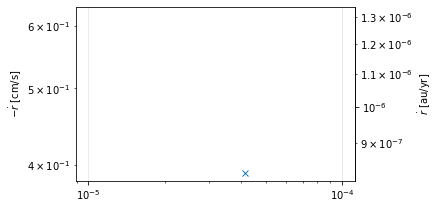

In [67]:
plot_drift(output_dir);

[ 0.          0.62831853  1.25663706  1.88495559  2.51327412  3.14159266
  3.76991119  4.39822972  5.02654825  5.65486678  6.28318531  6.91150384
  7.53982237  8.1681409   8.79645943  9.42477797 10.0530965  10.68141503
 11.30973356 11.93805209 12.56637062 13.19468915 13.82300768 14.45132621
 15.07964474 15.70796328 16.33628181 16.96460034 17.59291887 18.2212374
 18.84955593 19.47787446 20.10619299 20.73451152 21.36283005 21.99114859
 22.61946712 23.24778565 23.87610418 24.50442271 25.13274124 25.76105977
 26.3893783  27.01769683 27.64601536 28.2743339  28.90265243 29.53097096
 30.15928949 30.78760802 31.41592655 32.04424508 32.67256361 33.30088214
 33.92920067 34.5575192  35.18583774 35.81415627 36.4424748  37.07079333
 37.69911186 38.32743039 38.95574892 39.58406745 40.21238598 40.84070451
 41.46902305 42.09734158 42.72566011 43.35397864 43.98229717 44.6106157
 45.23893423 45.86725276 46.49557129 47.12388982 47.75220836 48.38052689
 49.00884542 49.63716395 50.26548248 50.89380101 51.5

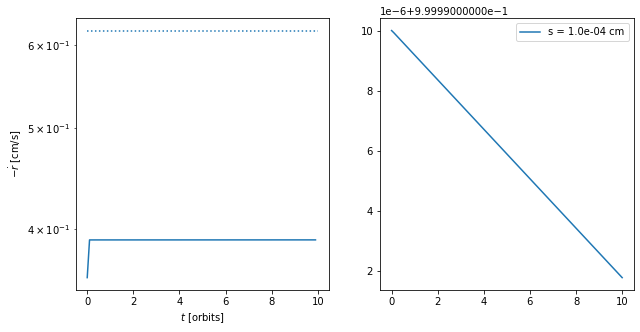

In [68]:
plot_trajectory(output_dir);

In [28]:
2.65*np.pi*1e-5/2

4.162610266006476e-05

Stokes number calculation is correct in the FARGO code in case of Epstein drag only

In [29]:
np.sqrt(2*np.pi)

2.5066282746310002

In [30]:
4.16/1.51

2.7549668874172184

In [31]:
1/np.sqrt(1.4)

0.8451542547285166

In [32]:
1/1.4

0.7142857142857143

In [33]:
import astropy.units as u
import astropy.constants as const

Gas density in cgs

In [54]:
rhog = (10*u.g/u.cm**2 / (np.sqrt(2*np.pi) * 0.05* 1 * u.au)).to("g/cm3")
rhog

<Quantity 5.33352886e-12 g / cm3>

mean free path according to HB03 https://iopscience.iop.org/article/10.1086/345472/pdf eq 20
l (cm) = 4.72e-9 / (rho_g / (g/cm3)) cm

In [55]:
l = 4.72e-9 *u.cm / rhog.to_value("g/cm3")
l

<Quantity 884.96755595 cm>

For a s = 1e-4 cm particle

In [56]:
f = (1e-4*u.cm) / (1e-4*u.cm + l)
f

<Quantity 1.1299848e-07>

In [36]:
m0 = 2.35*u.u
temperature = 626.9*u.K
vthermal = np.sqrt(8 * const.k_B * temperature / (np.pi*m0))

In [37]:
vthermal.decompose()

<Quantity 2376.57953771 m / s>

In [38]:
np.sqrt(8/np.pi)*0.05

0.07978845608028655

in the code at r=1, vthermal = 0.07979 calcualting from temperature

In [39]:
np.sqrt(8/np.pi)*0.05

0.07978845608028655

In Picogna et al 2015, Fig. C2 shows the theoretical drift rate for a particle of stokes number  7.4e-4, which is roughly 5e-6 in the units shown.
The axis is labeled as cm/s, however, the order of magnitude fits for au/yr

In [5]:
sigmaslope = -1
temperatureslope = -1
Mstar = 0.05*u.solMass
h = 0.05
r = 1*u.au
stokes = 7.4e-4
vK = np.sqrt(const.G*Mstar/r).decompose()
eta = h**2 * (sigmaslope + temperatureslope)
vdrift = eta*vK/(stokes + stokes**-1)
vdrift.to("au/yr")

<Quantity -5.19826188e-06 AU / yr>

<Quantity -0.00333003 m / s>

In [42]:
vK

<Quantity 29784.69182968 m / s>

In [43]:
np.sqrt(8/np.pi)*0.05*vK

<Quantity 2376.47457592 m / s>

4425000.0

In [ ]:
885/1e-4/2

In [64]:
10*(1*u.au).to_value("cm")

149597870700000.0

In [8]:
import numpy as np
import astropy.units as u
import astropy.constants as const
from drift_theo import vdrift_theo
vdrift_theo(7.4e-4, 1*u.au, Mstar=0.55*u.solMass, h=0.05).to("au/yr")

<Quantity -1.72406842e-05 AU / yr>